In [1]:
import numpy as np
import os
import sys
import math
import torch
import time
import re
import cv2
from pathlib import Path
from tqdm import tqdm
from matplotlib import pyplot as plt
from torchvision import transforms
from icecream import ic
from itertools import repeat
import random
# import sympy as sy
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from copy import deepcopy

In [26]:
a = np.arange(100)
random.choices(a, k=4)

[61, 64, 83, 85]

In [27]:
bin(212992)

'0b110100000000000000'

# matrix

In [203]:
m,n,p = 2,3,4
a = np.random.randint(0,10, size=(m, p))
b = np.random.randint(0,10, size=(p, n))
a, b, a@b

(array([[7, 0, 2, 2],
        [9, 3, 6, 8]]),
 array([[3, 0, 7],
        [0, 1, 6],
        [5, 9, 9],
        [9, 6, 2]]),
 array([[ 49,  30,  71],
        [129, 105, 151]]))

In [200]:
def matrix_mul(a, b):
    c = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            for k in range(p):
                c[i,j] += a[i, k]*b[k, j]
    return c

In [200]:
def matrix_mul(a, b):
    c = np.zeros((m, n))
    for i in range(m):
        for k in range(p):
            for j in range(n):
    return c

In [204]:
matrix_mul(a, b)

array([[ 49.,  30.,  71.],
       [129., 105., 151.]])

In [205]:
np.einsum("ab, bc->ac", a, b)

array([[ 49,  30,  71],
       [129, 105, 151]])

In [208]:
m,n,p = 2,3,4
a1 = np.random.randint(0,10, size=(m, p, 3))
b1 = np.random.randint(0,10, size=(p, n, 3))
c1 = np.einsum("hkc, kwc->chw", a1, b1)
c1

array([[[ 87,  63,  40],
        [135, 115,  93]],

       [[178, 161, 179],
        [138, 129, 147]],

       [[126, 171,  97],
        [156, 192, 108]]])

In [214]:
a2 = np.random.randint(0,10,size=(2,3,4))
a2
np.einsum("abc->cab", a2)
np.einsum("abc->ca", a2)

array([[[9, 4, 7, 7],
        [4, 8, 9, 5],
        [3, 4, 5, 2]],

       [[2, 2, 5, 7],
        [6, 4, 1, 9],
        [8, 0, 8, 4]]])

array([[[9, 4, 3],
        [2, 6, 8]],

       [[4, 8, 4],
        [2, 4, 0]],

       [[7, 9, 5],
        [5, 1, 8]],

       [[7, 5, 2],
        [7, 9, 4]]])

array([[16, 16],
       [16,  6],
       [21, 14],
       [14, 20]])

# aplt 

In [690]:
a = 176+72+47+72+40
a 
a / (195+386)

407

0.7005163511187608

In [215]:
b = 61
b
b / (195+386)
c = 97
c / (195+386)

61

0.10499139414802065

0.16695352839931152

# free

In [120]:
np.random.uniform(-1,1,size=(10,))

array([ 0.03539268,  0.21553914, -0.98582894,  0.44265166, -0.15179107,
       -0.25053548, -0.6835056 ,  0.56808226, -0.95499826, -0.18357662])

In [123]:
np.random.rand(2,3)

array([[0.61910053, 0.21419449, 0.70208857],
       [0.81382575, 0.50604175, 0.40632994]])

# cython

In [8]:
%load_ext Cython

In [3]:
def simple_loop():
    acc = 0
    for i in range(1000):
        acc += 1
    return acc

In [24]:
%%cython
def cc_simple_loop():
    acc = 0
    for i in range(1000):
        acc += i
    return acc

In [21]:
%%cython
def cc_simple_loop2():
    cdef int acc = 0
    for i in range(1000):
        acc += i
    return acc

In [22]:
%%cython
def cc_simple_loop3():
    cdef int acc = 0
    cdef int i = 0
    for i in range(1000):
        acc += i
    return acc

In [11]:
%timeit simple_loop()

43.5 µs ± 2.32 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [25]:
%timeit cc_simple_loop()

26.4 µs ± 850 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [26]:
%timeit cc_simple_loop2()

38.6 µs ± 774 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [27]:
%timeit cc_simple_loop3()

42.7 ns ± 0.0479 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


# plot 

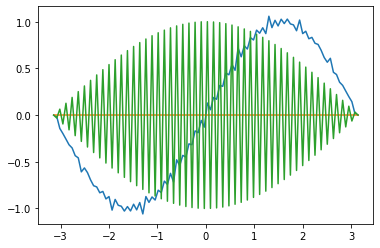

In [134]:
a = np.pi
x = np.linspace(-a,a,100).astype(np.float128)
y1 = np.zeros_like(x)
# y = np.sin(x) + 0.02*np.sin(20*x)+ 0.03*np.sin(30*x)+ 0.05*np.sin(50*x)
y = np.sin(x) + 0.02*np.sin(20*x)+ 0.02*np.sin(30*x)+0.02*np.sin(40*x)+ 0.05*np.sin(50*x)
y2 = np.sin(50*x)
plt.plot(x, y)
plt.plot(x, y1)
plt.plot(x, y2)

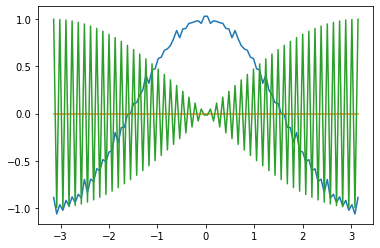

In [28]:
a = np.pi
x = np.linspace(-a,a,100).astype(np.float128)
y1 = np.zeros_like(x)
# y = np.sin(x) + 0.02*np.sin(20*x)+ 0.03*np.sin(30*x)+ 0.05*np.sin(50*x)
y = np.cos(x) + 0.02*np.cos(20*x)+ 0.02*np.cos(30*x)+0.02*np.cos(40*x)+ 0.05*np.cos(50*x)
y2 = np.cos(50*x)
plt.plot(x, y)
plt.plot(x, y1)
plt.plot(x, y2)

(200, 300)

/opt/conda/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Casting input data from float128 to float64 for imshow
  fig.canvas.print_figure(bytes_io, **kw)


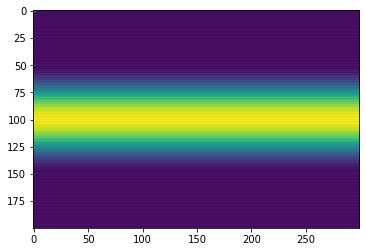

In [220]:
a = np.pi
x2 = np.linspace(-a,a,100).astype(np.float128)
x1 = np.linspace(-2*a,2*a,200).astype(np.float128)
y1 = -np.ones_like(x1)

# y = np.sin(x) + 0.02*np.sin(20*x)+ 0.03*np.sin(30*x)+ 0.05*np.sin(50*x)
y2 = np.cos(x2)
y2 += 0.02*np.cos(20*x2)+ 0.02*np.cos(30*x2)+0.02*np.cos(40*x2)+ 0.05*np.cos(50*x2)
y1[50:150] = y2
# y1 += 0.002*np.cos(20*x1)+ 0.01*np.cos(30*x1)+0.01*np.cos(40*x1)+ 0.01*np.cos(50*x1)
for i in range(20, 50):
    y1 += random.uniform(0.005, 0.01) * np.cos((i+random.uniform(0,10))*x1+random.uniform(-5,5))
    
# y2 = np.cos(50*x)
# plt.plot(x, y)
plt.plot(x1, y1)
# plt.plot(x2, y2)
y3 = y1.reshape(-1,1).repeat(300,1)
y3.shape
plt.imshow(y3)

(100, 300)

ic| A: array([[ 0.98480775,  0.17364818, -6.40357184],
              [-0.17364818,  0.98480775, 26.806839  ]])


array([[ 0.98480775,  0.17364818, -6.40357184],
       [-0.17364818,  0.98480775, 26.806839  ]])

(1.0433550999103576513, -1.0815453911530944813)

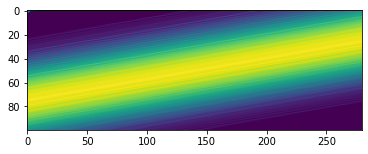

In [233]:
### a = np.pi
x2 = np.linspace(-a,a,100).astype(np.float128)
x1 = np.linspace(-2*a,2*a,200).astype(np.float128)
y1 = -np.ones_like(x1)

# y = np.sin(x) + 0.02*np.sin(20*x)+ 0.03*np.sin(30*x)+ 0.05*np.sin(50*x)
y2 = np.cos(x2)
y2 += 0.02*np.cos(20*x2)+ 0.02*np.cos(30*x2)+0.02*np.cos(40*x2)+ 0.05*np.cos(50*x2)
y1[50:150] = y2
# y1 += 0.002*np.cos(20*x1)+ 0.01*np.cos(30*x1)+0.01*np.cos(40*x1)+ 0.01*np.cos(50*x1)
for i in range(20, 50):
    y1 += random.uniform(0.005, 0.01) * np.cos((i+random.uniform(0,10))*x1+random.uniform(-5,5))
    
# y2 = np.cos(50*x)
# plt.plot(x, y)
plt.plot(x1, y1)
# plt.plot(x2, y2)
y3 = y1[50:-50].reshape(-1,1).repeat(300,1)
y3.shape
h, w = y3.shape[:2]
angle = 10
scale = 1
border = 0
A = cv2.getRotationMatrix2D(center=(w // 2, h // 2), angle=angle, scale=scale)
# y3 = cv2.warpAffine(y3, A, (w, h), borderValue=border)
ic(A)
y3.max(), y3.min()
y3 = (y3 - y3.min()) / (y3.max() - y3.min())
y3 *= 255
y3 = y3.astype(np.uint8)
y3 = cv2.warpAffine(y3, A, (w, h), borderValue=border)
y3 = y3[:, 10:-10]
plt.imshow(y3)

In [217]:
np.repeat?

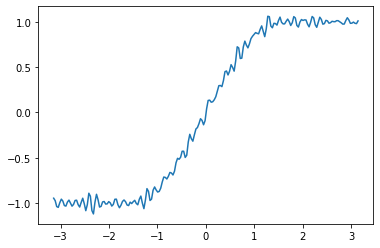

In [132]:
a = np.pi/2
x2 = np.linspace(-a,a,100).astype(np.float128)
x1 = np.linspace(-2*a,2*a,200).astype(np.float128)
y1 = np.r_[-np.ones_like(x2), np.ones_like(x2)]

# y = np.sin(x) + 0.02*np.sin(20*x)+ 0.03*np.sin(30*x)+ 0.05*np.sin(50*x)
y2 = np.sin(x2)
y2 += 0.02*np.sin(20*x2)+ 0.02*np.sin(30*x2)+0.02*np.sin(40*x2)+ 0.05*np.sin(50*x2)
y1[50:150] = y2
# y1 += 0.002*np.cos(20*x1)+ 0.01*np.cos(30*x1)+0.01*np.cos(40*x1)+ 0.01*np.cos(50*x1)
for i in range(20, 50):
    y1 += random.uniform(0.005, 0.01) * np.cos((i+random.uniform(0,10))*x1+random.uniform(-5,5))
    
# y2 = np.cos(50*x)
# plt.plot(x, y)
plt.plot(x1, y1)
# plt.plot(x2, y2)

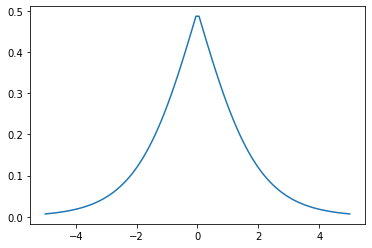

In [137]:
x = np.linspace(-5,5,100)
y = 1 / (1 + np.exp(np.abs(-x)))
plt.plot(x, y)

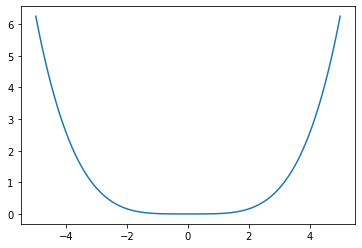

In [142]:
x = np.linspace(-5,5,100)
y = 0.01*x**4
plt.plot(x, y)

In [140]:
np.log(10)
np.log(2) + np.log(5)

2.302585092994046

2.3025850929940455

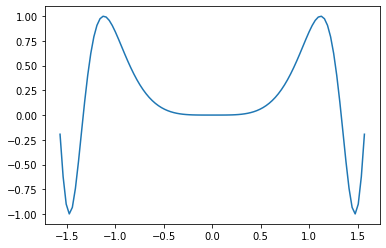

In [149]:
a = np.pi/2
x = np.linspace(-a,a,100)
y = np.sin(x**4)
plt.plot(x, y)

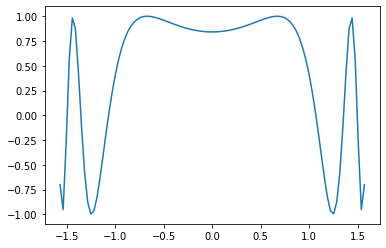

In [153]:
a = np.pi/2
x = np.linspace(-a,a,100)
y = np.sin(np.exp(x**2))
plt.plot(x, y)

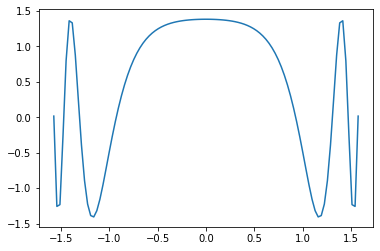

In [156]:
a = np.pi/2
x = np.linspace(-a,a,100)
y = np.sin(np.exp(x**2))+np.cos(np.exp(x**2))
plt.plot(x, y)

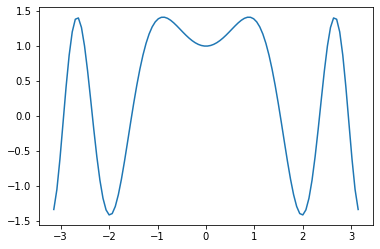

In [161]:
a = np.pi
x = np.linspace(-a,a,100)
y = 1*np.sin(x**2)+ 1*np.cos(x**2)

plt.plot(x, y)

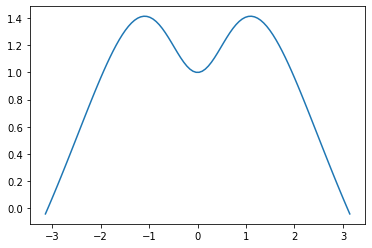

In [165]:
a = np.pi
x = np.linspace(-a,a,100)
y = 1*np.sin(np.log(1+x**2))+ 1*np.cos(np.log(x**2+1))

plt.plot(x, y)

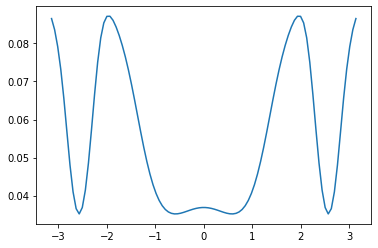

In [177]:
a = np.pi
x = np.linspace(-a,a,100)
y = 0.01 / (np.exp(np.sin(x**2)))+ 0.1 / (1 + np.exp(np.cos(x**2)))

plt.plot(x, y)

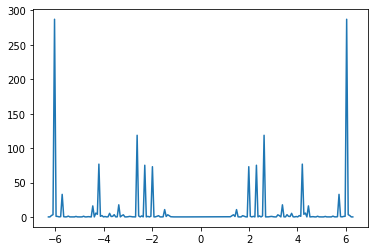

In [194]:
a = np.pi*2
x = np.linspace(-a,a,200)
y = 0.1 / (np.log(2+np.sin(x**4)))+ 0.1 / (np.log(2+np.cos(x**4)))

plt.plot(x, y)

In [135]:
from uuid import uuid1

In [141]:
a = uuid1()
type(a)
b = f"{a}"
b

uuid.UUID

'1e9eb2e1-e0bb-11ec-b8a9-193adce9d3f7'

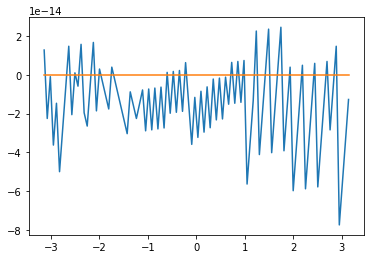

In [108]:
a = np.pi
x = np.linspace(-a,a,100)
y1 = np.zeros_like(x)
y = np.sin(x) + 1*np.sin(100*x)
y2 = np.sin(99*x)
plt.plot(x, y2)
plt.plot(x, y1)
# plt.plot(x, y2)

In [36]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [63]:
random.random()

0.5619639135717194

/tmp/ipykernel_692/4217533370.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


(-2.0, 2.0)

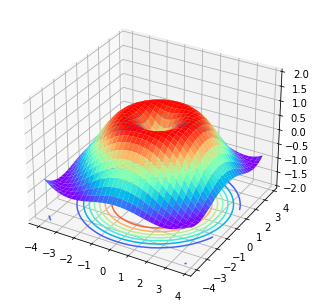

In [37]:
# 定义figure
fig = plt.figure()
# 创建3d图形的两种方式
# 将figure变为3d
ax = Axes3D(fig)

#ax = fig.add_subplot(111, projection='3d')

# 定义x, y
x = np.arange(-4, 4, 0.25)
y = np.arange(-4, 4, 0.25)

# 生成网格数据
X, Y = np.meshgrid(x, y)

# 计算每个点对的长度
R = np.sqrt(X ** 2 + Y ** 2)
# 计算Z轴的高度
Z = np.sin(R)

# 绘制3D曲面


# rstride:行之间的跨度  cstride:列之间的跨度
# rcount:设置间隔个数，默认50个，ccount:列的间隔个数  不能与上面两个参数同时出现


# cmap是颜色映射表
# from matplotlib import cm
# ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = cm.coolwarm)
# cmap = "rainbow" 亦可
# 我的理解的 改变cmap参数可以控制三维曲面的颜色组合, 一般我们见到的三维曲面就是 rainbow 的
# 你也可以修改 rainbow 为 coolwarm, 验证我的结论
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = plt.get_cmap('rainbow'))

# 绘制从3D曲面到底部的投影,zdir 可选 'z'|'x'|'y'| 分别表示投影到z,x,y平面
# zdir = 'z', offset = -2 表示投影到z = -2上
ax.contour(X, Y, Z, zdir = 'z', offset = -2, cmap = plt.get_cmap('rainbow'))

# 设置z轴的维度，x,y类似
ax.set_zlim(-2, 2)

plt.show()

In [39]:
# 定义x, y
x = np.arange(-4, 4, 0.25)
y = np.arange(-4, 4, 0.25)

# 生成网格数据
X, Y = np.meshgrid(x, y)

# 计算每个点对的长度
R = np.sqrt(X ** 2 + Y ** 2)
# 计算Z轴的高度
Z = np.sin(R)
Z

array([[-0.58617619, -0.7175353 , -0.82381719, ..., -0.90411471,
        -0.82381719, -0.7175353 ],
       [-0.7175353 , -0.830433  , -0.91423432, ..., -0.96892001,
        -0.91423432, -0.830433  ],
       [-0.82381719, -0.91423432, -0.97196248, ..., -0.99796201,
        -0.97196248, -0.91423432],
       ...,
       [-0.90411471, -0.96892001, -0.99796201, ..., -0.99325696,
        -0.99796201, -0.96892001],
       [-0.82381719, -0.91423432, -0.97196248, ..., -0.99796201,
        -0.97196248, -0.91423432],
       [-0.7175353 , -0.830433  , -0.91423432, ..., -0.96892001,
        -0.91423432, -0.830433  ]])

array([[0.20691324, 0.14123158, 0.08808894, ..., 0.04793889, 0.08808894,
        0.14123158],
       [0.14123158, 0.08478092, 0.04287892, ..., 0.0155352 , 0.04287892,
        0.08478092],
       [0.08808894, 0.04287892, 0.01401392, ..., 0.00101374, 0.01401392,
        0.04287892],
       ...,
       [0.04793889, 0.0155352 , 0.00101374, ..., 0.00336633, 0.00101374,
        0.0155352 ],
       [0.08808894, 0.04287892, 0.01401392, ..., 0.00101374, 0.01401392,
        0.04287892],
       [0.14123158, 0.08478092, 0.04287892, ..., 0.0155352 , 0.04287892,
        0.08478092]])

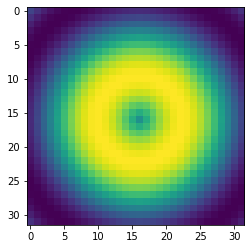

In [41]:
z = (Z - np.min(Z))/(np.max(Z) - np.min(Z))
z
plt.imshow(z)

# numpy 

In [643]:
a = np.arange(10)
np.random.choice(a, (100,))

array([6, 9, 5, 8, 2, 6, 7, 3, 4, 6, 0, 3, 6, 1, 8, 6, 3, 2, 4, 7, 1, 5,
       7, 2, 0, 2, 9, 0, 2, 7, 1, 4, 4, 5, 8, 5, 6, 0, 9, 1, 1, 4, 8, 5,
       4, 6, 5, 6, 6, 2, 3, 7, 0, 1, 3, 3, 4, 9, 2, 7, 4, 6, 3, 5, 5, 9,
       1, 6, 2, 1, 7, 4, 1, 7, 3, 9, 6, 5, 6, 6, 5, 4, 6, 7, 1, 0, 2, 6,
       3, 3, 6, 2, 3, 3, 8, 4, 2, 7, 8, 8])

In [646]:
from tqdm import tqdm, trange


In [649]:
with trange(10) as pbar:
    time.sleep(1)
    pbar.update()

 10%|█████████████                                                                                                                      | 1/10 [00:01<00:09,  1.00s/it]

True

 10%|█████████████                                                                                                                      | 1/10 [00:01<00:09,  1.01s/it]


In [651]:
import random

In [656]:
random.choices?

In [659]:
a = "hello"
list(a)

['h', 'e', 'l', 'l', 'o']

In [661]:
1411/944, 1024/768

(1.4947033898305084, 1.3333333333333333)

In [684]:
random.randint(0,2), np.random.randint(0,2)

(2, 0)

In [685]:
# 1^0, 1^1, 0^0, 0^1

(1, 0, 0, 1)

In [688]:
a = dict(a=1, b=2)
a

{'a': 1, 'b': 2}

## reverseBit

In [638]:
a = np.array([4720,7055])* 0.5()

a

array([2360. , 3527.5])

In [632]:
def dfs(n, m):
    if (m == 1):
        return n
    m >>= 1
    a = dfs(n>>m, m)
    b = dfs(n&(m-1), m)
    c = b << m + a
    return c
def reverseBits(n):
    ans = dfs(n, 32)
    return ans
a = int("100101",2)
a, bin(a)
b = reverseBits(a)
b, bin(b), len(bin(b)[2:])

(37, '0b100101')

(0, '0b0', 1)

In [634]:
np.log2(65536)

16.0

const uint32_t M1 = 0x55555555;  // 01010101010101010101010101010101
const uint32_t M2 = 0x33333333;  // 00110011001100110011001100110011
const uint32_t M4 = 0x0f0f0f0f;  // 00001111000011110000111100001111
const uint32_t M8 = 0x00ff00ff;  // 00000000111111110000000011111111

uint32_t reverseBits(uint32_t n) {
    n = n >> 1 & M1 | (n & M1) << 1;
    n = n >> 2 & M2 | (n & M2) << 2;
    n = n >> 4 & M4 | (n & M4) << 4;
    n = n >> 8 & M8 | (n & M8) << 8;
    return n >> 16 | n << 16;
}


In [601]:
M1 = 0x55555555  # 01010101010101010101010101010101
M2 = 0x33333333  # 00110011001100110011001100110011
M4 = 0x0f0f0f0f  # 00001111000011110000111100001111
M8 = 0x00ff00ff  # 00000000111111110000000011111111

In [628]:
def reverseBits(n):
    ic(n, bin(n))
    x = (n>>1 & M1)
    y = ((n & M1)<<1) 
    n = ((n >> 1) & M1) | ((n & M1) << 1)
    ic(n, bin(n), bin(x), bin(y), bin(x|y))
    x = (n>>2 & M2)
    y = ((n & M2)<<2) 
    n = n >> 2 & M2 | (n & M2) << 2
    ic(n, bin(n), bin(x), bin(y), bin(x|y))
    x = (n>>4 & M4)
    y = ((n & M4)<<4) 
    n = n >> 4 & M4 | (n & M4) << 4
    ic(n, bin(n), bin(x), bin(y), bin(x|y))
    x = (n>>8 & M8)
    y = ((n & M8)<<8)
    n = n >> 8 & M8 | (n & M8) << 8
    ic(n, bin(n), bin(x), bin(y), bin(x|y))
    
    return n >> 16 | n << 16
a = int("100101",2)
a, bin(a)
b = reverseBits(a)
b, bin(b), len(bin(b)[2:])

(37, '0b100101')

ic| n: 37, bin(n): '0b100101'
ic| n: 26
    bin(n): '0b11010'
    bin(x): '0b10000'
    bin(y): '0b1010'
    bin(x|y): '0b11010'
ic| n: 74
    bin(n): '0b1001010'
    bin(x): '0b10'
    bin(y): '0b1001000'
    bin(x|y): '0b1001010'
ic| n: 164
    bin(n): '0b10100100'
    bin(x): '0b100'
    bin(y): '0b10100000'
    bin(x|y): '0b10100100'
ic| n: 41984
    bin(n): '0b1010010000000000'
    bin(x): '0b0'
    bin(y): '0b1010010000000000'
    bin(x|y): '0b1010010000000000'


(2751463424, '0b10100100000000000000000000000000', 32)

In [620]:
def reverseBits(n):
    ic(n, bin(n))
    x = (n>>1 & M1)
    y = (n & M1) 
    n = n >> 1 & M1 | (n & M1) << 1
    ic(n, bin(n), bin(x), bin(y), bin(x|y))
    n = n >> 2 & M2 | (n & M2) << 2
    ic(n, bin(n))
    n = n >> 4 & M4 | (n & M4) << 4
    ic(n, bin(n))
    n = n >> 8 & M8 | (n & M8) << 8
    ic(n, bin(n))
    
    return n >> 16 | n << 16
a = int("100101",2)
a, bin(a)
b = reverseBits(a)
b, bin(b), len(bin(b)[2:])

(37, '0b100101')

ic| n: 37, bin(n): '0b100101'
ic| n: 26
    bin(n): '0b11010'
    bin(x): '0b10000'
    bin(y): '0b101'
    bin(x|y): '0b10101'
ic| n: 74, bin(n): '0b1001010'
ic| n: 164, bin(n): '0b10100100'
ic| n: 41984, bin(n): '0b1010010000000000'


(2751463424, '0b10100100000000000000000000000000', 32)

In [457]:
bin(0xaaaaaaaa)
bin(0xcccccccc)
bin(0xf0f0f0f0)
bin(0xff00ff00)
bin(0x55555555)
bin(0x33333333)
bin(0x0f0f0f0f)
bin(0x00ff00ff)

'0b10101010101010101010101010101010'

'0b11001100110011001100110011001100'

'0b11110000111100001111000011110000'

'0b11111111000000001111111100000000'

'0b1010101010101010101010101010101'

'0b110011001100110011001100110011'

'0b1111000011110000111100001111'

'0b111111110000000011111111'

In [610]:
a = int("100101",2)
a, bin(a)
b = reverseBits(a)
b, bin(b), len(bin(b)[2:])

(37, '0b100101')

(2751463424, '0b10100100000000000000000000000000', 32)

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 array([-16, -15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,
         -3,  -2,  -1]))

<Figure size 1152x720 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

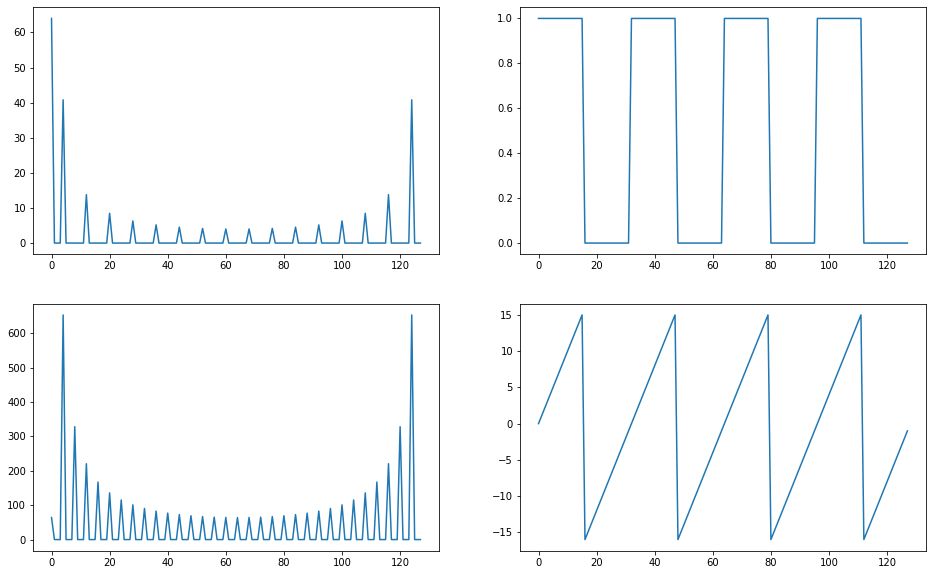

In [600]:
n = 16
a = np.ones((n, ))
a1 = np.arange(n)
b = np.zeros((n, ))
b1 = (-np.arange(1, n+1))[::-1]
a,b
a1, b1
c = np.r_[a, b].reshape(1, -1)
c1 = np.r_[a1, b1].reshape(1, -1)
# c, c.shape
d = c.repeat(4, 0).reshape(-1)
d1 = c1.repeat(4, 0).reshape(-1)
# d
# d1
df = fft(d)
df1 = fft(d1)
# df
# df[490:500] = 0
# df[0:5] *= 2
# df *= 0.5
# df+=100
idf = ifft(df)
idf1 = ifft(df1)
# idf1
plt.figure(figsize=(16,10))
plt.subplot(221)
plt.plot(np.abs(df))
plt.subplot(222)
plt.plot(idf.real)
plt.subplot(223)
plt.plot(np.abs(df1))
plt.subplot(224)
plt.plot(idf1.real)
plt.show()

In [548]:
a = np.array([1,1,2,3])
a.repeat(2, 0)

array([1, 1, 1, 1, 2, 2, 3, 3])

In [457]:
bin(0xaaaaaaaa)
bin(0xcccccccc)
bin(0xf0f0f0f0)
bin(0xff00ff00)
bin(0x55555555)
bin(0x33333333)
bin(0x0f0f0f0f)
bin(0x00ff00ff)

'0b10101010101010101010101010101010'

'0b11001100110011001100110011001100'

'0b11110000111100001111000011110000'

'0b11111111000000001111111100000000'

'0b1010101010101010101010101010101'

'0b110011001100110011001100110011'

'0b1111000011110000111100001111'

'0b111111110000000011111111'

In [519]:
def phi(n):
    ans = n
    i = 2
    while (i * i <= n):
        if (n % i == 0):
            ans -= ans//i
        while (n % i == 0): n //= i
        i += 1
#     print(n)
    if (n > 1): ans -= ans // n 
    return ans
    
for i in range(10):
    print(i, phi(i))

0 0
1 1
2 1
3 2
4 2
5 4
6 2
7 6
8 4
9 6


In [412]:
n = 100
cnt = 0
prim = np.zeros((n+1,), dtype=np.int64)
for i in range(2, n+1):
    if prim[i] == 0:
        prim[0] += 1
        prim[prim[0]] = i
    for j in range(1, prim[0]+1):
        if (i * prim[j] > n): break
#         print(i * prim[j], i, prim[j])
        prim[i*prim[j]] = 1
        if (i % prim[j]==0): 
            print(i * prim[j], i, prim[j])
            break
prim

4 2 2
9 3 3
8 4 2
25 5 5
12 6 2
49 7 7
16 8 2
27 9 3
20 10 2
24 12 2
28 14 2
45 15 3
32 16 2
36 18 2
40 20 2
63 21 3
44 22 2
48 24 2
52 26 2
81 27 3
56 28 2
60 30 2
64 32 2
99 33 3
68 34 2
72 36 2
76 38 2
80 40 2
84 42 2
88 44 2
92 46 2
96 48 2
100 50 2


array([25,  2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53,
       59, 61, 67, 71, 73, 79, 83, 89, 97,  1,  1,  1,  0,  1,  0,  1,  1,
        1,  1,  1,  0,  1,  1,  1,  0,  1,  0,  1,  1,  1,  0,  1,  1,  1,
        1,  1,  0,  1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  0,
        1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  0,  1,  1,  1,  0,  1,
        1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1])

In [404]:
prim[1:prim[0]+1]
# prim[:100]

array([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59,
       61, 67, 71, 73, 79, 83, 89, 97])

In [398]:
prim

array([25,  2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53,
       59, 61, 67, 71, 73, 79, 83, 89, 97,  1,  1,  1,  0,  1,  0,  1,  1,
        1,  1,  1,  0,  1,  1,  1,  0,  1,  0,  1,  1,  1,  0,  1,  1,  1,
        1,  1,  0,  1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  0,
        1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  0,  1,  1,  1,  0,  1,
        1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1])

In [24]:
def multishow(*args):
    plt.figure(figsize=(10, 6))
    size = len(args)
    n = math.ceil(size/2)
    for i in range(size):
        plt.subplot(n, 2, i+1)
        if args[i].ndim == 3:
            plt.imshow(args[i][...,::-1])
        else:
            plt.imshow(args[i])
    plt.show()

In [4]:
for i in range(4):
    i, i^3

(0, 3)

(1, 2)

(2, 1)

(3, 0)

In [12]:
a = np.array([[0,0,1,1,0,1,0,0,1,0],[1,1,0,1,1,0,1,1,1,0],[1,0,1,1,1,0,0,1,1,0],[0,1,1,0,0,0,0,1,0,1],[0,0,0,0,0,0,1,1,1,0],[0,1,0,1,0,1,0,1,1,1],[1,0,1,0,1,1,0,0,0,1],[1,1,1,1,1,1,0,0,0,0],[1,1,1,0,0,1,0,1,0,1],[1,1,1,0,1,1,0,1,1,0]])

In [9]:
b =[[1, 2],
[2, 1],
[2, 6],
[3, 8],
[6, 1],
[6, 3],
[6, 8],
[8, 4]]
b

[[1, 2], [2, 1], [2, 6], [3, 8], [6, 1], [6, 3], [6, 8], [8, 4]]

In [15]:
c = deepcopy(a)
for x in b:
    i,j = x
    c[i,j] = 2

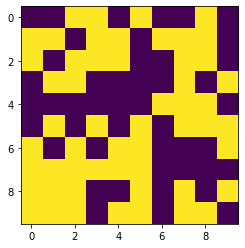

In [16]:
plt.imshow(a)

In [39]:
a = np.array([[1,2,2,3,5],[3,2,3,4,4],[2,4,5,3,1],[6,7,1,4,5],[5,1,1,2,4]])

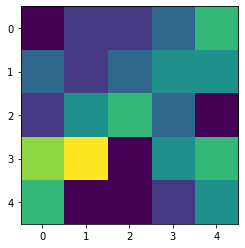

In [40]:
plt.imshow(a)

array([[1, 2, 2, 3, 5],
       [3, 2, 3, 4, 4],
       [2, 4, 5, 3, 1],
       [6, 7, 1, 4, 5],
       [5, 1, 1, 2, 4]])

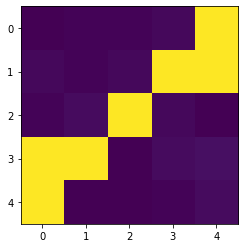

In [42]:
b = deepcopy(a)
for x, y in [[0,4],[1,3],[1,4],[2,2],[3,0],[3,1],[4,0]]:
    b[x,y] = 100
a
plt.imshow(b)

In [21]:
a = np.array([[0,0,0,0],[1,0,1,0],[0,1,1,0],[0,0,0,0]])
a

array([[0, 0, 0, 0],
       [1, 0, 1, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 0]])

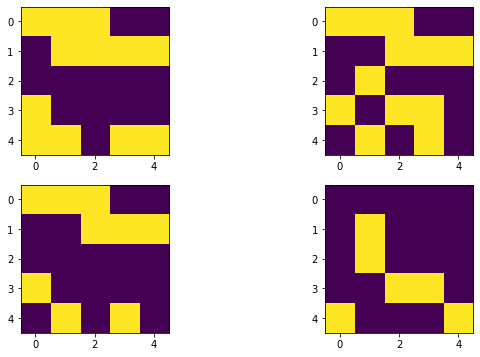

In [27]:
a = np.array([[1,1,1,0,0],[0,1,1,1,1],[0,0,0,0,0],[1,0,0,0,0],[1,1,0,1,1]])
b = np.array([[1,1,1,0,0],[0,0,1,1,1],[0,1,0,0,0],[1,0,1,1,0],[0,1,0,1,0]])
c = a & b
d = a^b
multishow(a, b, c,d)

In [28]:
def some_func(f = lambda x:x+1):
    return f
def some_func_out(func, m):
    return lambda n:some_func(func)(n)+m

In [30]:
some_func_out(lambda x:x**2, 20)(10)
some_func(lambda x:x**2)(10)

120

100

a = "hello"
a.capitalize()

In [32]:
from itertools import product

In [34]:
a = (1,2)
b = (2, 4)
list(product(a, b))

[(1, 2), (1, 4), (2, 2), (2, 4)]

In [78]:
a = np.random.randint(0,2,(10,))
a 
b = deepcopy(a)
b[a==1] = a[a==1]^ 3
b
a ^ 3

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 0])

array([0, 2, 2, 2, 0, 2, 0, 2, 2, 0])

array([3, 2, 2, 2, 3, 2, 3, 2, 2, 3])

In [83]:
a = np.array([0,1,2,3])
b = a ^ 3
c = b ^ 3
a
b
c



array([0, 1, 2, 3])

array([3, 2, 1, 0])

array([0, 1, 2, 3])

In [84]:
1 ^ 3

2

# doctest

In [85]:
import doctest

In [120]:
# @doctest_mode
def simple(n):
#     """
#     >>> simple(3)
#     11
#     >>> simple(4)
#     14
#     >>> simple(5)
#     16
#     """
    return 3*n + 2;

In [95]:
doctest.testmod()

**********************************************************************
File "__main__", line 8, in __main__.simple
Failed example:
    simple(5)
Expected:
    16
Got:
    17
**********************************************************************
1 items had failures:
   1 of   3 in __main__.simple
***Test Failed*** 1 failures.


TestResults(failed=1, attempted=3)

In [96]:
def fib(n):
    return fib(n - 1) + fib(n - 2) else n

SyntaxError: invalid syntax (2248096530.py, line 2)

# regex

In [156]:
def search(pat:str, text:str):
    """
    >>> search("a*bcd", "bcd")
    True
    >>> search("a*bcd", "abcd")
    True
    >>> search("a*bcd", "aaabcd")
    True
    >>> search("a?bcd", "bcd")
    True
    >>> search("a?bcd", "abcd")
    True
    >>> search("a?bcd", "aaabcd")
    True
    >>> search("a+bcd", "bcd")
    False
    >>> search("a+bcd", "abcd")
    True
    >>> search("a+bcd", "aaabcd")
    True
    >>> search("^abcd", "abcdefg")
    True
    >>> search("^bcd", "abcdefg")
    False
    >>> search("abcd$", "aaabcd")
    True
    >>> search("abcd$", "abcdefg")
    False
    """
    if pat.startswith("^"):
        return match(pat[1:], text)
    else:
        return match(".*" + pat, text)

In [122]:
def match_1(p, t):
    """
    >>> match_1('h', 'hello')
    True
    >>> match_1('e', 'hello')
    False
    """
    if not t: return False
    return p == '.' or p == t[0]

In [158]:
def match_plus(p, _pat, text):
    return match_1(p, text) and (
        match(_pat, text) or match_plus(p, _pat, text[1:])
    )

In [149]:
def match(pat: str, text: str):
    """
    >>> match("a*bcd", "bcd")
    True
    >>> match("a*bcd", "abcd")
    True
    >>> match("a*bcd", "aaabcd")
    True
    >>> match("a?bcd", "bcd")
    True
    >>> match("a?bcd", "abcd")
    True
    >>> match("a?bcd", "aaabcd")
    False
    >>> match("a+bcd", "bcd")
    False
    >>> match("a+bcd", "abcd")
    True
    >>> match("a+bcd", "aaabcd")
    True
    """
    if pat == '': return True
    if pat == '$': return text == ''
    elif len(pat) > 1 and pat[1] in "*?+":
        p, op, _pat = pat[0], pat[1], pat[2:]
        if op == '*':
            return match(_pat, text) or (
                    match_1(p, text) and match(pat, text[1:])
            )

        elif op == '?':
            return match(p + _pat, text) or match(_pat, text)
        elif op == '+':
            # print(p, op, _pat)
            # print(p+"*"+_pat, pat)
            # exit()
            return match_1(p, text) and match(p+'*'+_pat, text[1:])
            # return match_1(p, text) and match(pat, text[1:])

    else:
        return match_1(pat[0], text) and match(pat[1:], text[1:])

match("a+bcd", "abcd")  

True

In [157]:
doctest.testmod()

TestResults(failed=0, attempted=24)

# Complex


In [193]:
a = 1 + 3j
b = 2+4j
a*b


(-10+10j)

In [176]:
a / b

(0.7+0.1j)

In [181]:
a = 2
math.exp(50*math.log(a))

1125899906842625.0

In [182]:
2**50

1125899906842624

In [183]:
(0+0j)**0

(1+0j)

In [194]:
b = 2-4j
b**3
b**(1/4)

(-88+16j)

(1.3988656059159141-0.39738840378983187j)

In [188]:
2**(1/2)

1.4142135623730951

In [189]:
a1 = (1.398866-0.397388j)
a2 = (0.397388+1.398866j)
a3 = (-1.398866+0.397388j)
a4 = (-0.397389-1.398866j)

In [190]:
for x in [a1, a2, a3, a4]:
    x**4

(2.0000069368789806-4.000000227603984j)

(2.0000069368789806-4.000000227603984j)

(2.0000069368789806-4.000000227603984j)

(1.9999978564553682-4.00000852608683j)

In [197]:
b
np.sin(b)
np.cos(b)

(2-4j)

(24.83130584894638+11.356612711218173j)

(-11.36423470640106+24.814651485634183j)

# fft

In [29]:
from scipy.fft import fft, fftshift, ifft, fftfreq

In [287]:
fftfreq?

In [459]:
a = np.arange(0,4)
a

array([0, 1, 2, 3])

In [260]:
a = np.array([-4,-2,-2,0,1,2,4]) 

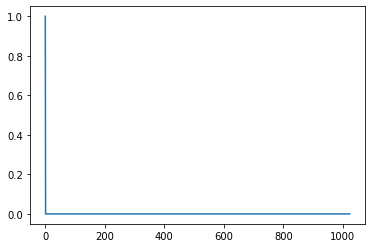

In [487]:
a = np.sin(np.linspace(-10*np.pi, 10*np.pi, 1000))
a = np.cos(np.linspace(0, 1024*np.pi, 2048))
# a = np.linspace(-1,1,16)
a = np.ones(1024)
b = fft(a)
# b
# b1 = fftshift(b)
# b1
plt.plot(np.abs(b)/np.max(np.abs(b)))
plt.show()

In [288]:
fftfreq(10)
fftfreq(10,0.1)

array([ 0. ,  0.1,  0.2,  0.3,  0.4, -0.5, -0.4, -0.3, -0.2, -0.1])

array([ 0.,  1.,  2.,  3.,  4., -5., -4., -3., -2., -1.])

<Figure size 720x288 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

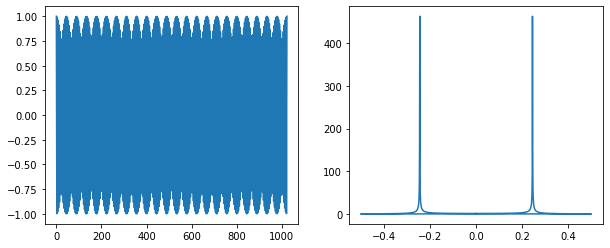

In [35]:
n = 1024
# a = np.sin(np.linspace(-np.pi, 1*np.pi, n)) + np.cos(np.linspace(0, 100*np.pi, n))
# a = np.sin(np.cos(np.linspace(0, 100*np.pi, n)))
# a = np.sin(np.linspace(-0.25*np.pi, 0.25*np.pi, n)) + np.cos(np.linspace(-0.25*np.pi, 0.25*np.pi, n))
# a = np.sin(np.linspace(-0*np.pi, 10*np.pi, n)) + np.cos(np.linspace(-0*np.pi, 1000*np.pi, n))
a = np.cos(np.linspace(0, 500*np.pi, n))
# a = np.linspace(-1,1,n)
x = fftfreq(n)
# x
b = fft(a)
# b
# b1 = fftshift(b)
# b1
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(a)
plt.subplot(1,2,2)
plt.plot(x, np.abs(b))
# plt.plot(x, b.real-b.imag)
# plt.plot(b.real-b.imag)
plt.show()

In [32]:
b.real - b.imag

array([1.        , 0.9969421 , 0.99390416, ..., 1.00929591, 1.00617666,
       1.0030781 ])

In [262]:
c = ifft(b)
c

array([-4.00000000e+00+0.j, -2.00000000e+00+0.j, -2.00000000e+00+0.j,
        3.17206578e-16+0.j,  1.00000000e+00+0.j,  2.00000000e+00+0.j,
        4.00000000e+00+0.j])

# myfft

## DIT-FFT

In [452]:
def __transform(a:np.array, n:int, type=1):
#     n = len(a)
    if n == 1: return 
    m = n // 2
    a1 = np.zeros((m,), dtype=a.dtype)
    a2 = np.zeros((m,), dtype=a.dtype)
    for i in range(m):
        a1[i] = a[i<<1]
        a2[i] = a[(i<<1)|1]
    __transform(a1, m, type)
    __transform(a2, m, type)
    wn = 1+0j
    w1 = np.cos(2*np.pi/n) + type * np.sin(2*np.pi/n)*1j
    for i in range(m):
        a[i] = a1[i] + wn * a2[i]
        a[i + m] = a1[i] - wn * a2[i]
        wn *= w1
    return 
def myfft(a:np.array, n:int):
    temp = np.zeros((n,),dtype=np.complex64)
    for i in range(a.shape[0]):temp[i] = a[i]
    __transform(temp, n, 1)
    return temp
def myifft(a:np.array, n:int):
    temp = np.zeros((n,),dtype=np.complex64)
    for i in range(a.shape[0]):temp[i] = a[i]
    __transform(temp, n, -1)
    temp /= a.shape[0]
    return temp    
x = np.arange(8)
y = myfft(x, 8)
z = myifft(y, 8)
y
z    

array([28.+0.j  , -4.-9.66j, -4.-4.j  , -4.-1.66j, -4.+0.j  , -4.+1.66j,
       -4.+4.j  , -4.+9.66j], dtype=complex64)

array([0.+0.j, 1.-0.j, 2.-0.j, 3.-0.j, 4.+0.j, 5.+0.j, 6.+0.j, 7.+0.j],
      dtype=complex64)

In [457]:
bin(0xaaaaaaaa)
bin(0xcccccccc)
bin(0xf0f0f0f0)
bin(0xff00ff00)
bin(0x55555555)
bin(0x33333333)
bin(0x0f0f0f0f)
bin(0x00ff00ff)

'0b10101010101010101010101010101010'

'0b11001100110011001100110011001100'

'0b11110000111100001111000011110000'

'0b11111111000000001111111100000000'

'0b1010101010101010101010101010101'

'0b110011001100110011001100110011'

'0b1111000011110000111100001111'

'0b111111110000000011111111'

In [458]:
bin(0xaaaaaaaa>>1)
bin(0xcccccccc>>2)
bin(0xf0f0f0f0>>4)
bin(0xff00ff00>>8)
bin(0x55555555<<1)
bin(0x33333333<<2)
bin(0x0f0f0f0f<<4)
bin(0x00ff00ff<<8)

'0b1010101010101010101010101010101'

'0b110011001100110011001100110011'

'0b1111000011110000111100001111'

'0b111111110000000011111111'

'0b10101010101010101010101010101010'

'0b11001100110011001100110011001100'

'0b11110000111100001111000011110000'

'0b11111111000000001111111100000000'

## DIF-FFT

In [453]:
def __transform(a:np.array, n:int, type=1):
#     n = len(a)
    if n == 1: return 
    m = n // 2
    a1 = a[:m]
    a2 = a[m:]
#     a1 = np.zeros((m,), dtype=a.dtype)
#     a2 = np.zeros((m,), dtype=a.dtype)
#     for i in range(m):
#         a1[i] = a[i<<1]
#         a2[i] = a[(i<<1)|1]
    __transform(a1, m, type)
    __transform(a2, m, type)
    wn = 1+0j
    w1 = np.cos(2*np.pi/n) + type * np.sin(2*np.pi/n)*1j
    for i in range(m):
        a[i] = a1[i] + wn * a2[i]
        a[i + m] = a1[i] - wn * a2[i]
        wn *= w1
    return 
def myfft(a:np.array, n:int):
    temp = np.zeros((n,),dtype=np.complex64)
    for i in range(a.shape[0]):temp[i] = a[i]
    __transform(temp, n, 1)
    return temp
def myifft(a:np.array, n:int):
    temp = np.zeros((n,),dtype=np.complex64)
    for i in range(a.shape[0]):temp[i] = a[i]
    __transform(temp, n, -1)
    temp /= a.shape[0]
    return temp    
x = np.arange(8)
y = myfft(x, 8)
z = myifft(y, 8)
y
z    

array([28.  +0.j  , -1.41+9.07j,  1.  +9.j  , -2.83+2.83j,  6.  +0.j  ,
        0.  +2.j  ,  1.  -0.j  ,  0.  -0.j  ], dtype=complex64)

array([3.97+2.86j, 5.07-0.74j, 3.57+0.38j, 2.97-0.53j, 3.09+2.61j,
       4.62-0.13j, 3.32+1.13j, 3.5 +0.j  ], dtype=complex64)

In [451]:
def __transform(a:np.array, n:int, type=1):
#     n = len(a)
    if n == 1: return 
    m = n // 2
    a1 = np.zeros((m,), dtype=a.dtype)
    a2 = np.zeros((m,), dtype=a.dtype)
    for i in range(m):
        a1[i] = a[i<<1]
        a2[i] = a[(i<<1)|1]
    __transform(a1, m, type)
    __transform(a2, m, type)
    wn = 1+0j
    w1 = np.cos(2*np.pi/n) + type * np.sin(2*np.pi/n)*1j
    for i in range(m):
        a[i] = a1[i] + wn * a2[i]
        a[i + m] = a1[i] - wn * a2[i]
        wn *= w1
    return 
def myfft(a:np.array, n:int):
    temp = np.zeros((n,),dtype=np.complex64)
    for i in range(a.shape[0]):temp[i] = a[i]
    __transform(temp, n, -1)
    return temp
def myifft(a:np.array, n:int):
    temp = np.zeros((n,),dtype=np.complex64)
    for i in range(a.shape[0]):temp[i] = a[i]
    __transform(temp, n, 1)
    temp /= a.shape[0]
    return temp    
x = np.arange(8)
y = myfft(x, 8)
z = myifft(y, 8)
y
z    

array([28.+0.j  , -4.+9.66j, -4.+4.j  , -4.+1.66j, -4.+0.j  , -4.-1.66j,
       -4.-4.j  , -4.-9.66j], dtype=complex64)

array([0.+0.j, 1.+0.j, 2.+0.j, 3.+0.j, 4.+0.j, 5.-0.j, 6.-0.j, 7.-0.j],
      dtype=complex64)

In [446]:
from icecream import ic
ic(a)

ic| a: array([-1.  , -0.33,  0.33,  1.  ])


array([-1.  , -0.33,  0.33,  1.  ])

In [447]:
def __transform2(a:np.array, n:int, type=1):
#     n = len(a)
    if n == 1: return 
    m = n // 2
    a1 = np.zeros((m + (n % m),), dtype=a.dtype)
    a2 = np.zeros((m,), dtype=a.dtype)
    for i in range(m):
        a1[i] = a[i<<1]
        a2[i] = a[(i<<1)|1]
    if (n % m):
        a1[-1] = a[-1]
    ic(a1)
    ic(a2)
    __transform2(a1, m, type)
    __transform2(a2, m, type)
    wn = 1+0j
    w1 = np.cos(2*np.pi/n) + type * np.sin(2*np.pi/n)*1j
    for i in range(m):
        a[i] = a1[i] + wn * a2[i]
        a[i + m] = a1[i] - wn * a2[i]
        wn *= w1
    return 
def myfft2(a:np.array, n:int):
    temp = np.zeros((n,),dtype=np.complex64)
    for i in range(a.shape[0]):temp[i] = a[i]
    __transform2(temp, n, 1)
    return temp
def myifft2(a:np.array, n:int):
    temp = np.zeros((n,),dtype=np.complex64)
    for i in range(a.shape[0]):temp[i] = a[i]
    __transform2(temp, n, -1)
    temp /= a.shape[0]
    return temp    
x = np.array([1, 2, 3])
n = x.shape[0]
y = myfft2(x, n)
z = myifft2(y, n)
y
z    

ic| a1: array([1.+0.j], dtype=complex64)
ic| a2: array([2.+0.j], dtype=complex64)
ic| a1: array([3.+0.j], dtype=complex64)
ic| a2: array([-1.+0.j], dtype=complex64)


array([ 3.+0.j, -1.+0.j,  3.+0.j], dtype=complex64)

array([0.67+0.j, 1.33+0.j, 1.  +0.j], dtype=complex64)

In [329]:
x = np.array([-4,-3,-2,-1, 0, 1, 2, 3, 4])
y = myfft(x, 16)
z = myifft(y, 16)[:x.shape[0]]
y
z

array([ 0.0000000e+00+0.0000000e+00j, -1.7137072e+01+1.5059664e-08j,
        4.4408921e-16-9.6568546e+00j, -5.6199141e+00-1.2784344e-09j,
        8.8817842e-16-4.0000000e+00j, -4.7232313e+00-1.2784337e-09j,
        2.2204460e-15-1.6568543e+00j, -4.5197830e+00+1.5059667e-08j,
        0.0000000e+00+0.0000000e+00j, -4.5197830e+00-1.5059662e-08j,
       -1.3322676e-15+1.6568543e+00j, -4.7232313e+00+1.2784330e-09j,
       -8.8817842e-16+4.0000000e+00j, -5.6199141e+00+1.2784332e-09j,
       -1.3322676e-15+9.6568546e+00j, -1.7137072e+01-1.5059666e-08j],
      dtype=complex64)

array([-4.0000000e+00+1.1102230e-16j, -3.0000002e+00+1.4180604e-09j,
       -2.0000000e+00+1.1102230e-16j, -1.0000001e+00+7.2656361e-09j,
        5.5511151e-17-1.2325952e-32j,  1.0000001e+00-4.1392192e-09j,
        2.0000000e+00-3.3306691e-16j,  3.0000002e+00+1.4180603e-09j,
        4.0000000e+00-1.1102230e-16j], dtype=complex64)

8

array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ])

array([ 0.  +0.j  , -2.87-1.19j, -0.2 +0.2j , -0.33-0.79j, -1.2 +0.j  ,
       -0.33+0.79j, -0.2 -0.2j , -2.87+1.19j], dtype=complex64)

array([-1. +0.j, -0.6-0.j, -0.2-0.j,  0.2+0.j,  0.6+0.j,  1. +0.j,
        0. +0.j, -0. -0.j], dtype=complex64)

<Figure size 720x576 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

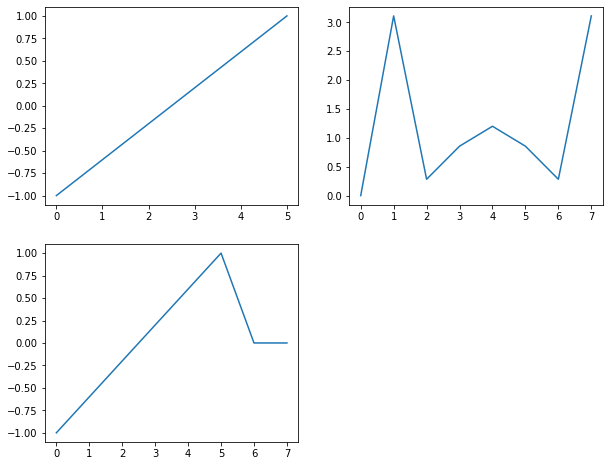

In [433]:
np.set_printoptions(precision=2,suppress=True)
n = 1000
x = np.sin(np.linspace(-np.pi, 1*np.pi, n)) + np.cos(np.linspace(0, 100*np.pi, n)) +np.cos(np.linspace(0, 1000*np.pi, n))
x = np.linspace(-1,1,1000)
x = np.sin(10*np.cos(np.linspace(-np.pi, 1*np.pi, n)))
x = np.arange(6)
x = np.linspace(-1,1,6)
n = min(n, x.shape[0])
N = 1
while (N < n): N<<=1
N
y = myfft(x, N)
l = 400
r = 600
e = None if l == 0 else -l
# y[l:r] = 0
# y[-r:e] = 0
z = myifft(y, N)
x
y
z
# x[:10]
# y[:10]
# z[:10]
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.plot(x)
plt.subplot(2,2,2)
plt.plot(np.abs(y))
plt.subplot(2,2,3)
plt.plot(z.real)
plt.show()

array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ])

array([-1.6+0.j  , -1.2-0.69j,  0.1+0.87j, -0.8+0.j  , -0.4+0.69j,
        1.1-0.87j], dtype=complex64)

array([-0.58+0.03j, -0.42-0.14j, -0.28+0.03j,  0.08+0.26j, -0.15-0.14j,
        0.15+0.2j ], dtype=complex64)

<Figure size 720x576 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

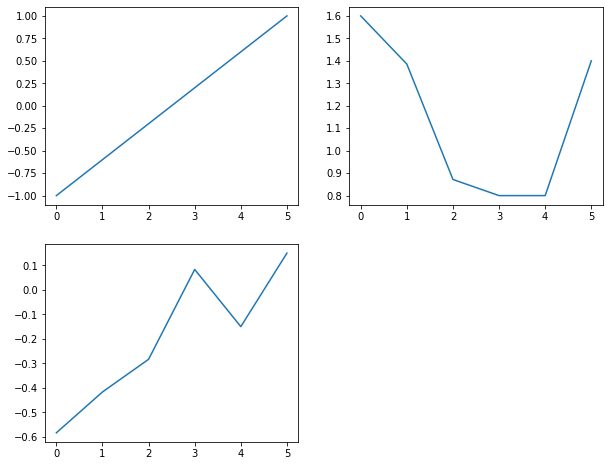

In [434]:
np.set_printoptions(precision=2,suppress=True)
n = 1000
x = np.sin(np.linspace(-np.pi, 1*np.pi, n)) + np.cos(np.linspace(0, 100*np.pi, n)) +np.cos(np.linspace(0, 1000*np.pi, n))
x = np.linspace(-1,1,1000)
x = np.sin(10*np.cos(np.linspace(-np.pi, 1*np.pi, n)))
x = np.arange(6)
x = np.linspace(-1,1,6)
n = min(n, x.shape[0])
N = 1
while (N < n): N<<=1
N = n
y = myfft(x, N)
l = 400
r = 600
e = None if l == 0 else -l
# y[l:r] = 0
# y[-r:e] = 0
z = myifft(y, N)
x
y
z
# x[:10]
# y[:10]
# z[:10]
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.plot(x)
plt.subplot(2,2,2)
plt.plot(np.abs(y))
plt.subplot(2,2,3)
plt.plot(z.real)
plt.show()

array([-1.        , -0.33333333,  0.33333333,  1.        ])

(4,)

array([-1.11022302e-16-0.j        , -1.33333333e+00+1.33333333j,
       -1.33333333e+00-0.j        , -1.33333333e+00-1.33333333j])

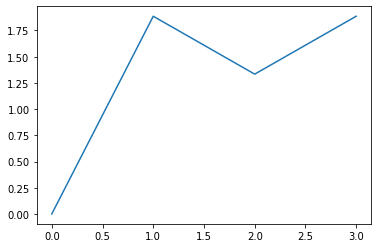

In [426]:
a = np.sin(np.linspace(-10*np.pi, 10*np.pi, 1000))
# a = np.cos(np.linspace(-np.pi, np.pi, 100))
a = np.linspace(-1,1,4)
# a = np.arange(4)
a
b = fft(a)
b.shape
b
# b1 = fftshift(b)
# b1
plt.plot(np.abs(b))
plt.show()

In [344]:
y.dtype
y[:10].real
y.shape, y[:10].shape, y[-10:].shape

dtype('complex64')

array([  1.0000012, -37.704926 ,   3.6593206,   3.2179189,   3.0922737,
         3.0323474,   2.9914072,   2.9536734,   2.911427 ,   2.8597207],
      dtype=float32)

((1024,), (10,), (10,))

# gym 

In [162]:
import gym

In [164]:
import gym
env = gym.make('CartPole-v0')
#生成环境
env.reset()
#重置环境，让环境回到起点
for _ in range(100):
    env.render()
    #提供环境（把游戏中发生的显示到屏幕上）
    env.step(env.action_space.sample()) 
    #env.action_space.sample() 会在动作空间中随机选择一个
    #env.step会顺着这个动作进入下一个状态
env.close()


array([ 0.01977585,  0.03800463, -0.03670713,  0.00693857], dtype=float32)

error: No available video device

In [167]:
len(bin(100000000)[2:])

27

In [170]:
hex(int(1e9))

'0x3b9aca00'

In [171]:
0xffff

65535

In [206]:
5+1 << 2, 1 <<2, (5+1)<<2

(24, 4, 24)

In [207]:
bin(5), bin(24), bin(6)

('0b101', '0b11000', '0b110')

In [209]:
a = 1+2j
a

(1+2j)

In [250]:
a = np.ones((4, 1),dtype=np.complex64)
a
b1 = np.array([1, 1j, -1, -1j], dtype=np.complex64).reshape(-1, 1)
b1
c = a.copy()
for i in range(1, 4):
    c = np.c_[c, b1**i]
c


array([[1.+0.j],
       [1.+0.j],
       [1.+0.j],
       [1.+0.j]], dtype=complex64)

array([[ 1.+0.j],
       [ 0.+1.j],
       [-1.+0.j],
       [-0.-1.j]], dtype=complex64)

array([[ 1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j],
       [ 1.+0.j,  0.+1.j, -1.+0.j, -0.-1.j],
       [ 1.+0.j, -1.+0.j,  1.-0.j, -1.+0.j],
       [ 1.+0.j, -0.-1.j, -1.+0.j,  0.+1.j]], dtype=complex64)

In [227]:
b1

array([[ 1.+0.j],
       [ 0.+0.j],
       [-1.+0.j],
       [ 0.+0.j]], dtype=complex64)

In [251]:
a = np.ones((4, 1),dtype=np.complex64)
a
b2= np.array([1, -1j, -1, 1j], dtype=np.complex64).reshape(-1, 1)
b2
d = a.copy()
for i in range(1, 4):
    d = np.c_[d, b2**i]
d


array([[1.+0.j],
       [1.+0.j],
       [1.+0.j],
       [1.+0.j]], dtype=complex64)

array([[ 1.+0.j],
       [-0.-1.j],
       [-1.+0.j],
       [ 0.+1.j]], dtype=complex64)

array([[ 1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j],
       [ 1.+0.j, -0.-1.j, -1.+0.j,  0.+1.j],
       [ 1.+0.j, -1.+0.j,  1.-0.j, -1.+0.j],
       [ 1.+0.j,  0.+1.j, -1.+0.j, -0.-1.j]], dtype=complex64)

In [254]:
e = np.linalg.inv(c) * 4
e

array([[ 1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j],
       [ 1.+0.j,  0.-1.j, -1.+0.j,  0.+1.j],
       [ 1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j],
       [ 1.+0.j,  0.+1.j, -1.-0.j,  0.-1.j]], dtype=complex64)

In [246]:
np.array([1+2j], dtype=np.complex64)

array([1.+2.j], dtype=complex64)

In [243]:
np.array([i])

array([3])

In [245]:
1 + 2j

(1+2j)

In [450]:
a = 0
b = 2
bin(a), bin(b), bin(a^b)

('0b0', '0b10', '0b10')